In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('cars_sampled.csv')

In [3]:
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
0,30/03/2016 13:51,Zu_verkaufen,private,offer,4450,test,limousine,2003,manual,150,3er,150000,3,diesel,bmw,NaN,30/03/2016 0:00,20257,7/4/2016 4:44
1,7/3/2016 9:54,Volvo_XC90_2.4D_Summum,private,offer,13299,control,suv,2005,manual,163,xc_reihe,150000,6,diesel,volvo,no,7/3/2016 0:00,88045,26/03/2016 13:17
2,1/4/2016 0:57,Volkswagen_Touran,private,offer,3200,test,bus,2003,manual,101,touran,150000,11,diesel,volkswagen,NaN,31/03/2016 0:00,27449,1/4/2016 8:40
3,19/03/2016 17:50,Seat_Ibiza_1.4_16V_Reference,private,offer,4500,control,small car,2006,manual,86,ibiza,60000,12,petrol,seat,no,19/03/2016 0:00,34537,7/4/2016 4:44
4,16/03/2016 14:51,Volvo_XC90_D5_Aut._RDesign_R_Design_AWD_GSHD_S...,private,offer,18750,test,suv,2008,automatic,185,xc_reihe,150000,11,diesel,volvo,no,16/03/2016 0:00,55270,1/4/2016 23:18


In [4]:
df=df.drop(['dateCrawled','dateCreated','postalCode','lastSeen','monthOfRegistration','name','model','offerType','notRepairedDamage'],axis=1)

In [5]:
df.drop_duplicates(keep='first',inplace=True)

In [6]:
df.shape

(48777, 10)

In [7]:
df.describe()

,price,yearOfRegistration,powerPS,kilometer
count,4.877700e+04,48777.000000,48777.000000,48777.000000
mean,6.635186e+03,2005.629375,117.006171,125348.934949
std,8.688379e+04,124.520114,233.188674,40339.749804
min,0.000000e+00,1000.000000,0.000000,5000.000000
25%,1.190000e+03,1999.000000,70.000000,100000.000000
50%,2.999000e+03,2003.000000,106.000000,150000.000000
75%,7.250000e+03,2008.000000,150.000000,150000.000000
max,1.234568e+07,9999.000000,19312.000000,150000.000000


In [8]:
import datetime
df=df[(df['yearOfRegistration']<(datetime.datetime.now().year)) & (df['yearOfRegistration']>1950)]

In [9]:
df.shape

(48711, 10)

In [10]:
df['totalyears']=datetime.datetime.now().year-df['yearOfRegistration']

In [11]:
df=df.drop(['yearOfRegistration'],axis=1)

In [12]:
df=df[(df['powerPS']<250) & (df['powerPS']>10)]

In [13]:
df.shape

(41410, 10)

In [14]:
q1,q3=df['price'].quantile([0.25,0.75])

In [15]:
IQR=q3-q1
print(IQR,q1,q3)

5800.0 1300.0 7100.0


In [16]:
df=df[(df['price']>4000) & (df['price']<14000)]

In [17]:
df.shape

(13580, 10)

In [18]:
df.describe()

,price,powerPS,kilometer,totalyears
count,13580.000000,13580.000000,13580.000000,13580.000000
mean,7704.613034,134.823564,116941.458027,13.732548
std,2697.658712,43.988493,41537.741097,6.307092
min,4005.000000,11.000000,5000.000000,2.000000
25%,5490.000000,105.000000,90000.000000,11.000000
50%,7000.000000,136.000000,150000.000000,13.000000
75%,9500.000000,163.000000,150000.000000,15.000000
max,13999.000000,249.000000,150000.000000,69.000000


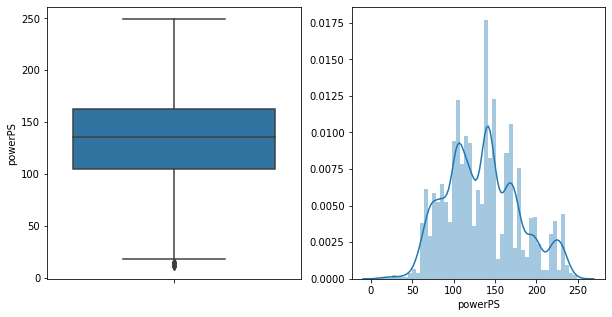

In [19]:
fig=plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(y=df['powerPS'])
plt.subplot(1,2,2)
sns.distplot(df['powerPS'])
plt.show()

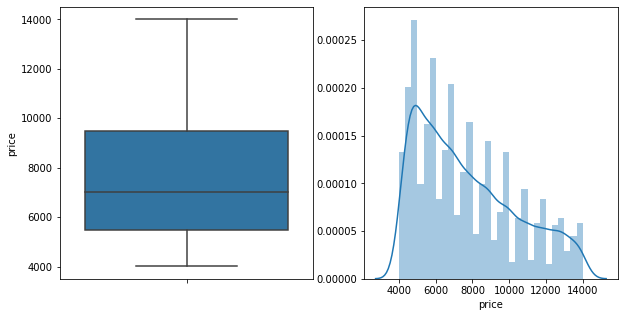

In [20]:
fig=plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(y=df['price'])
plt.subplot(1,2,2)
sns.distplot(df['price'])
plt.show()

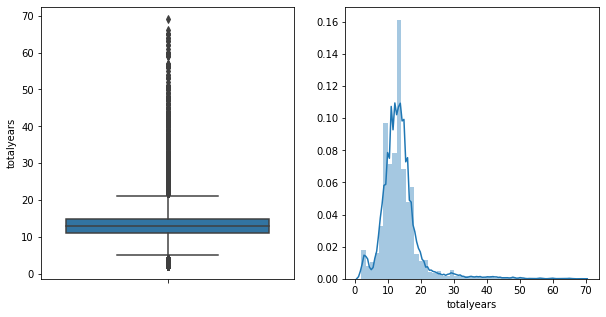

In [21]:
fig=plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(y=df['totalyears'])
plt.subplot(1,2,2)
sns.distplot(df['totalyears'])
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

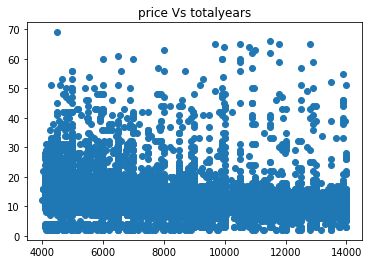

In [22]:
plt.scatter(df['price'],df['totalyears'])
plt.title('price Vs totalyears')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

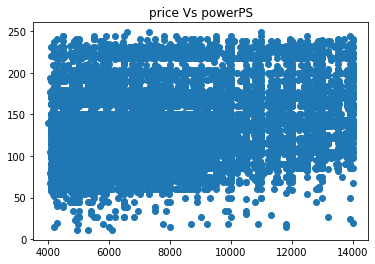

In [23]:
plt.scatter(df['price'],df['powerPS'])
plt.title('price Vs powerPS')
plt.show

In [24]:
df.head()

,seller,price,abtest,vehicleType,gearbox,powerPS,kilometer,fuelType,brand,totalyears
0,private,4450,test,limousine,manual,150,150000,diesel,bmw,17
1,private,13299,control,suv,manual,163,150000,diesel,volvo,15
3,private,4500,control,small car,manual,86,60000,petrol,seat,14
8,private,4680,test,station wagon,manual,122,150000,petrol,opel,15
9,private,8340,test,limousine,automatic,140,125000,diesel,skoda,15


In [25]:
df.isnull().sum()

seller           0
price            0
abtest           0
vehicleType    606
gearbox        177
powerPS          0
kilometer        0
fuelType       496
brand            0
totalyears       0
dtype: int64

In [26]:
df1=df[(df['vehicleType'].isnull()) & (df['gearbox'].isnull()) & (df['fuelType'].isnull())]

In [27]:
df.shape

(13580, 10)

In [28]:
df3=pd.concat([df,df1,df1]).drop_duplicates(keep=False)

In [29]:
df3.shape

(13562, 10)

In [30]:
df3.isnull().sum()

seller           0
price            0
abtest           0
vehicleType    588
gearbox        159
powerPS          0
kilometer        0
fuelType       478
brand            0
totalyears       0
dtype: int64

In [31]:
def impute_nan(df,variable):
    df[variable+"_random"]=df[variable]
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [32]:
impute_nan(df3,'gearbox')

In [34]:
df3['fuelType'].value_counts()

petrol     6993
diesel     5828
lpg         203
cng          32
hybrid       19
electro       8
other         1
Name: fuelType, dtype: int64

In [35]:
impute_nan(df3,'fuelType')

In [37]:
df3['fuelType_random'].value_counts()

petrol     7267
diesel     6021
lpg         211
cng          33
hybrid       21
electro       8
other         1
Name: fuelType_random, dtype: int64

In [38]:
impute_nan(df3,'vehicleType')

In [40]:
df3=df3.drop(['vehicleType','fuelType','gearbox'],axis=1)

In [41]:
df3.head()

,seller,price,abtest,powerPS,kilometer,brand,totalyears,gearbox_random,fuelType_random,vehicleType_random
0,private,4450,test,150,150000,bmw,17,manual,diesel,limousine
1,private,13299,control,163,150000,volvo,15,manual,diesel,suv
3,private,4500,control,86,60000,seat,14,manual,petrol,small car
8,private,4680,test,122,150000,opel,15,manual,petrol,station wagon
9,private,8340,test,140,125000,skoda,15,automatic,diesel,limousine


In [43]:
col=['seller','abtest','vehicleType_random','gearbox_random','fuelType_random','brand']
for i in col:
    df3[i]=df3[i].astype('category')
    print(i , df3[i].unique())

seller [private]
Categories (1, object): [private]
abtest [test, control]
Categories (2, object): [test, control]
vehicleType_random [limousine, suv, small car, station wagon, others, coupe, cabrio, bus]
Categories (8, object): [limousine, suv, small car, station wagon, others, coupe, cabrio, bus]
gearbox_random [manual, automatic]
Categories (2, object): [manual, automatic]
fuelType_random [diesel, petrol, cng, lpg, hybrid, electro, other]
Categories (7, object): [diesel, petrol, cng, lpg, hybrid, electro, other]
brand [bmw, volvo, seat, opel, skoda, ..., lancia, trabant, land_rover, rover, daihatsu]
Length: 39
Categories (39, object): [bmw, volvo, seat, opel, ..., trabant, land_rover, rover, daihatsu]


In [96]:
 list(df3[i].unique())

['bmw',
 'volvo',
 'seat',
 'opel',
 'skoda',
 'sonstige_autos',
 'mercedes_benz',
 'volkswagen',
 'mini',
 'ford',
 'audi',
 'alfa_romeo',
 'renault',
 'dacia',
 'fiat',
 'jeep',
 'chevrolet',
 'nissan',
 'peugeot',
 'mazda',
 'smart',
 'hyundai',
 'kia',
 'citroen',
 'toyota',
 'suzuki',
 'mitsubishi',
 'chrysler',
 'honda',
 'jaguar',
 'porsche',
 'saab',
 'subaru',
 'lada',
 'lancia',
 'trabant',
 'land_rover',
 'rover',
 'daihatsu']

In [44]:
df4=pd.get_dummies(df3,columns=['seller','abtest','gearbox_random'],drop_first=True)

In [45]:
df4.head()

,price,powerPS,kilometer,brand,totalyears,fuelType_random,vehicleType_random,abtest_test,gearbox_random_manual
0,4450,150,150000,bmw,17,diesel,limousine,1,1
1,13299,163,150000,volvo,15,diesel,suv,0,1
3,4500,86,60000,seat,14,petrol,small car,0,1
8,4680,122,150000,opel,15,petrol,station wagon,1,1
9,8340,140,125000,skoda,15,diesel,limousine,1,0


In [47]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df4.vehicleType_random= le.fit_transform(df4.vehicleType_random.values)
df4.fuelType_random= le.fit_transform(df4.fuelType_random.values)
df4.brand= le.fit_transform(df4.brand.values)

In [48]:
df4.head()

,price,powerPS,kilometer,brand,totalyears,fuelType_random,vehicleType_random,abtest_test,gearbox_random_manual
0,4450,150,150000,2,17,1,3,1,1
1,13299,163,150000,38,15,1,7,0,1
3,4500,86,60000,29,14,6,5,0,1
8,4680,122,150000,23,15,6,6,1,1
9,8340,140,125000,30,15,1,3,1,0


In [49]:
df4.corr()

,price,powerPS,kilometer,brand,totalyears,fuelType_random,vehicleType_random,abtest_test,gearbox_random_manual
price,1.000000,0.255919,-0.196077,-0.079388,-0.196989,-0.089670,0.002777,-0.003230,-0.114622
powerPS,0.255919,1.000000,0.457068,-0.339058,0.128586,-0.175322,-0.000098,-0.015691,-0.367106
kilometer,-0.196077,0.457068,1.000000,-0.126661,0.209078,-0.428219,-0.028258,-0.007023,-0.153498
brand,-0.079388,-0.339058,-0.126661,1.000000,-0.073177,-0.000325,-0.071527,0.012738,0.086964
totalyears,-0.196989,0.128586,0.209078,-0.073177,1.000000,0.096389,-0.151737,-0.000099,-0.087424
fuelType_random,-0.089670,-0.175322,-0.428219,-0.000325,0.096389,1.000000,-0.085893,-0.000297,0.135142
vehicleType_random,0.002777,-0.000098,-0.028258,-0.071527,-0.151737,-0.085893,1.000000,0.004266,-0.046483
abtest_test,-0.003230,-0.015691,-0.007023,0.012738,-0.000099,-0.000297,0.004266,1.000000,-0.002253
gearbox_random_manual,-0.114622,-0.367106,-0.153498,0.086964,-0.087424,0.135142,-0.046483,-0.002253,1.000000


In [50]:
X=df4.iloc[:,1:]
y=df4.iloc[:,0]

In [51]:
X.shape,y.shape

((13562, 8), (13562,))

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)
X_train.shape, X_test.shape

((9493, 8), (4069, 8))

In [53]:
from sklearn.preprocessing import StandardScaler
norm_p=StandardScaler()
norm_p.fit(X_train['powerPS'].values.reshape(-1,1))
X_train['powerPS']=norm_p.transform(X_train['powerPS'].values.reshape(-1,1))
X_test['powerPS']=norm_p.transform(X_test['powerPS'].values.reshape(-1,1))

C:\Users\anudeep\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\anudeep\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [54]:
norm_p.fit(X_train['kilometer'].values.reshape(-1,1))
X_train['kilometer']=norm_p.transform(X_train['kilometer'].values.reshape(-1,1))
X_test['kilometer']=norm_p.transform(X_test['kilometer'].values.reshape(-1,1))

C:\Users\anudeep\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\anudeep\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [79]:
X_train.head()

,powerPS,kilometer,brand,totalyears,fuelType_random,vehicleType_random,abtest_test,gearbox_random_manual
7877,150,150000,2,24,6,1,0,1
32989,192,90000,18,14,6,2,0,1
18121,208,125000,32,14,6,3,0,1
126,136,150000,3,11,6,7,1,1
35351,222,150000,37,15,1,3,0,0


In [80]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 500, num = 8)]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 15, num = 3)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15,50]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [81]:
grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [82]:
from sklearn.ensemble import RandomForestRegressor
reg=RandomForestRegressor()

In [83]:
rf_random=RandomizedSearchCV(estimator=reg,param_distributions=grid,scoring='neg_mean_absolute_error',return_train_score=True,n_iter=5,cv=3,verbose=2,random_state=2)

In [84]:
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] n_estimators=214, min_samples_split=10, min_samples_leaf=5, max_depth=15 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=214, min_samples_split=10, min_samples_leaf=5, max_depth=15, total=   2.5s
[CV] n_estimators=214, min_samples_split=10, min_samples_leaf=5, max_depth=15 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.6s remaining:    0.0s


[CV]  n_estimators=214, min_samples_split=10, min_samples_leaf=5, max_depth=15, total=   2.4s
[CV] n_estimators=214, min_samples_split=10, min_samples_leaf=5, max_depth=15 
[CV]  n_estimators=214, min_samples_split=10, min_samples_leaf=5, max_depth=15, total=   2.6s
[CV] n_estimators=385, min_samples_split=50, min_samples_leaf=5, max_depth=10 
[CV]  n_estimators=385, min_samples_split=50, min_samples_leaf=5, max_depth=10, total=   3.6s
[CV] n_estimators=385, min_samples_split=50, min_samples_leaf=5, max_depth=10 
[CV]  n_estimators=385, min_samples_split=50, min_samples_leaf=5, max_depth=10, total=   3.3s
[CV] n_estimators=385, min_samples_split=50, min_samples_leaf=5, max_depth=10 
[CV]  n_estimators=385, min_samples_split=50, min_samples_leaf=5, max_depth=10, total=   3.3s
[CV] n_estimators=157, min_samples_split=5, min_samples_leaf=2, max_depth=15 
[CV]  n_estimators=157, min_samples_split=5, min_samples_leaf=2, max_depth=15, total=   2.1s
[CV] n_estimators=157, min_samples_split=5,

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:   47.2s finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [85]:
rf_random.best_params_

{'n_estimators': 157,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_depth': 15}

In [86]:
rf_random.best_score_

-1339.4357916701435

In [87]:
y_pred=rf_random.predict(X_test)

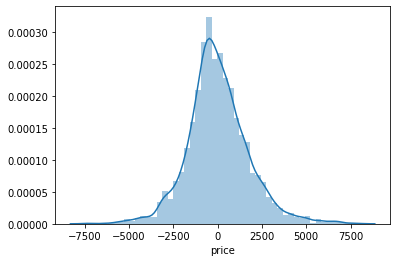

In [88]:
sns.distplot(y_test-y_pred)

In [89]:
errors = abs(y_test - y_pred)

In [90]:
print('Metrics for Random Forest Trained on Original Data')
print('Average absolute error:', round(np.mean(errors), 2), 'degrees.')

Metrics for Random Forest Trained on Original Data
Average absolute error: 1292.54 degrees.


In [91]:
mape = 100 * (errors / y_test)

In [92]:
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 82.34 %.


In [93]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1292.5361365454721
MSE: 3004383.0332207032
RMSE: 1733.3156184667303


In [94]:
import pickle
# open a file, where you ant to store the data
file = open('random_forest_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)